**Run the two cells below before you begin. These will set the notebook to autosave every 10 seconds, import the necessary libraries for this challenge, and set figure appearance.**

In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
import math
import numpy as np

mpl.rcParams['figure.dpi'] = 400
mpl.rcParams['font.size'] = 4

**To begin, import data set `cleaned_data.csv` and create lists of feature names for the remaining financial features: `'BILL_AMT1'`, `'BILL_AMT2'`, `'BILL_AMT3'`, `'BILL_AMT4'`, `'BILL_AMT5'`, `'BILL_AMT6'`,  `'PAY_AMT1'`, `'PAY_AMT2'`, `'PAY_AMT3'`, `'PAY_AMT4'`, `'PAY_AMT5'`, and `'PAY_AMT6'`.**

**Name the features `bill_feats` and `pay_amt_feats`, respectively.**

In [3]:
# Import the dataset
df = pd.read_csv(r"D:\Technocolabs\Mini Projects\Mini Project 2\Edited\cleaned_data.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [4]:
# Create lists `bill_feats` and `pay_amt_feats`
bill_feats = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_amt_feats =  ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5','PAY_AMT6']

____________________________________________________________________________________
**Next, use `.describe()` to examine statistical summaries of the bill amount features**


In [5]:
for col in bill_feats:
  print(df[col].describe())


count     26664.000000
mean      51405.730723
std       73633.687106
min     -165580.000000
25%        3580.000000
50%       22361.000000
75%       67649.750000
max      746814.000000
Name: BILL_AMT1, dtype: float64
count     26664.000000
mean      49300.001500
std       70934.549534
min      -69777.000000
25%        2999.750000
50%       21150.000000
75%       64395.500000
max      671563.000000
Name: BILL_AMT2, dtype: float64
count     26664.000000
mean      47026.340047
std       68705.359524
min     -157264.000000
25%        2627.250000
50%       20079.500000
75%       60360.000000
max      855086.000000
Name: BILL_AMT3, dtype: float64
count     26664.000000
mean      43338.894539
std       64275.250740
min     -170000.000000
25%        2341.750000
50%       19037.000000
75%       54727.500000
max      706864.000000
Name: BILL_AMT4, dtype: float64
count     26664.000000
mean      40338.136701
std       60705.944083
min      -81334.000000
25%        1745.000000
50%       18066.00000

Reflect on what you see. Does it make sense?

___________________________________________________________________________________
**Then you should visualize the bill amount features using a 2 by 3 grid of histogram plots.**
> Hint: You can use 20 bins for this visualization.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000236B4636820>,
      dtype=object)

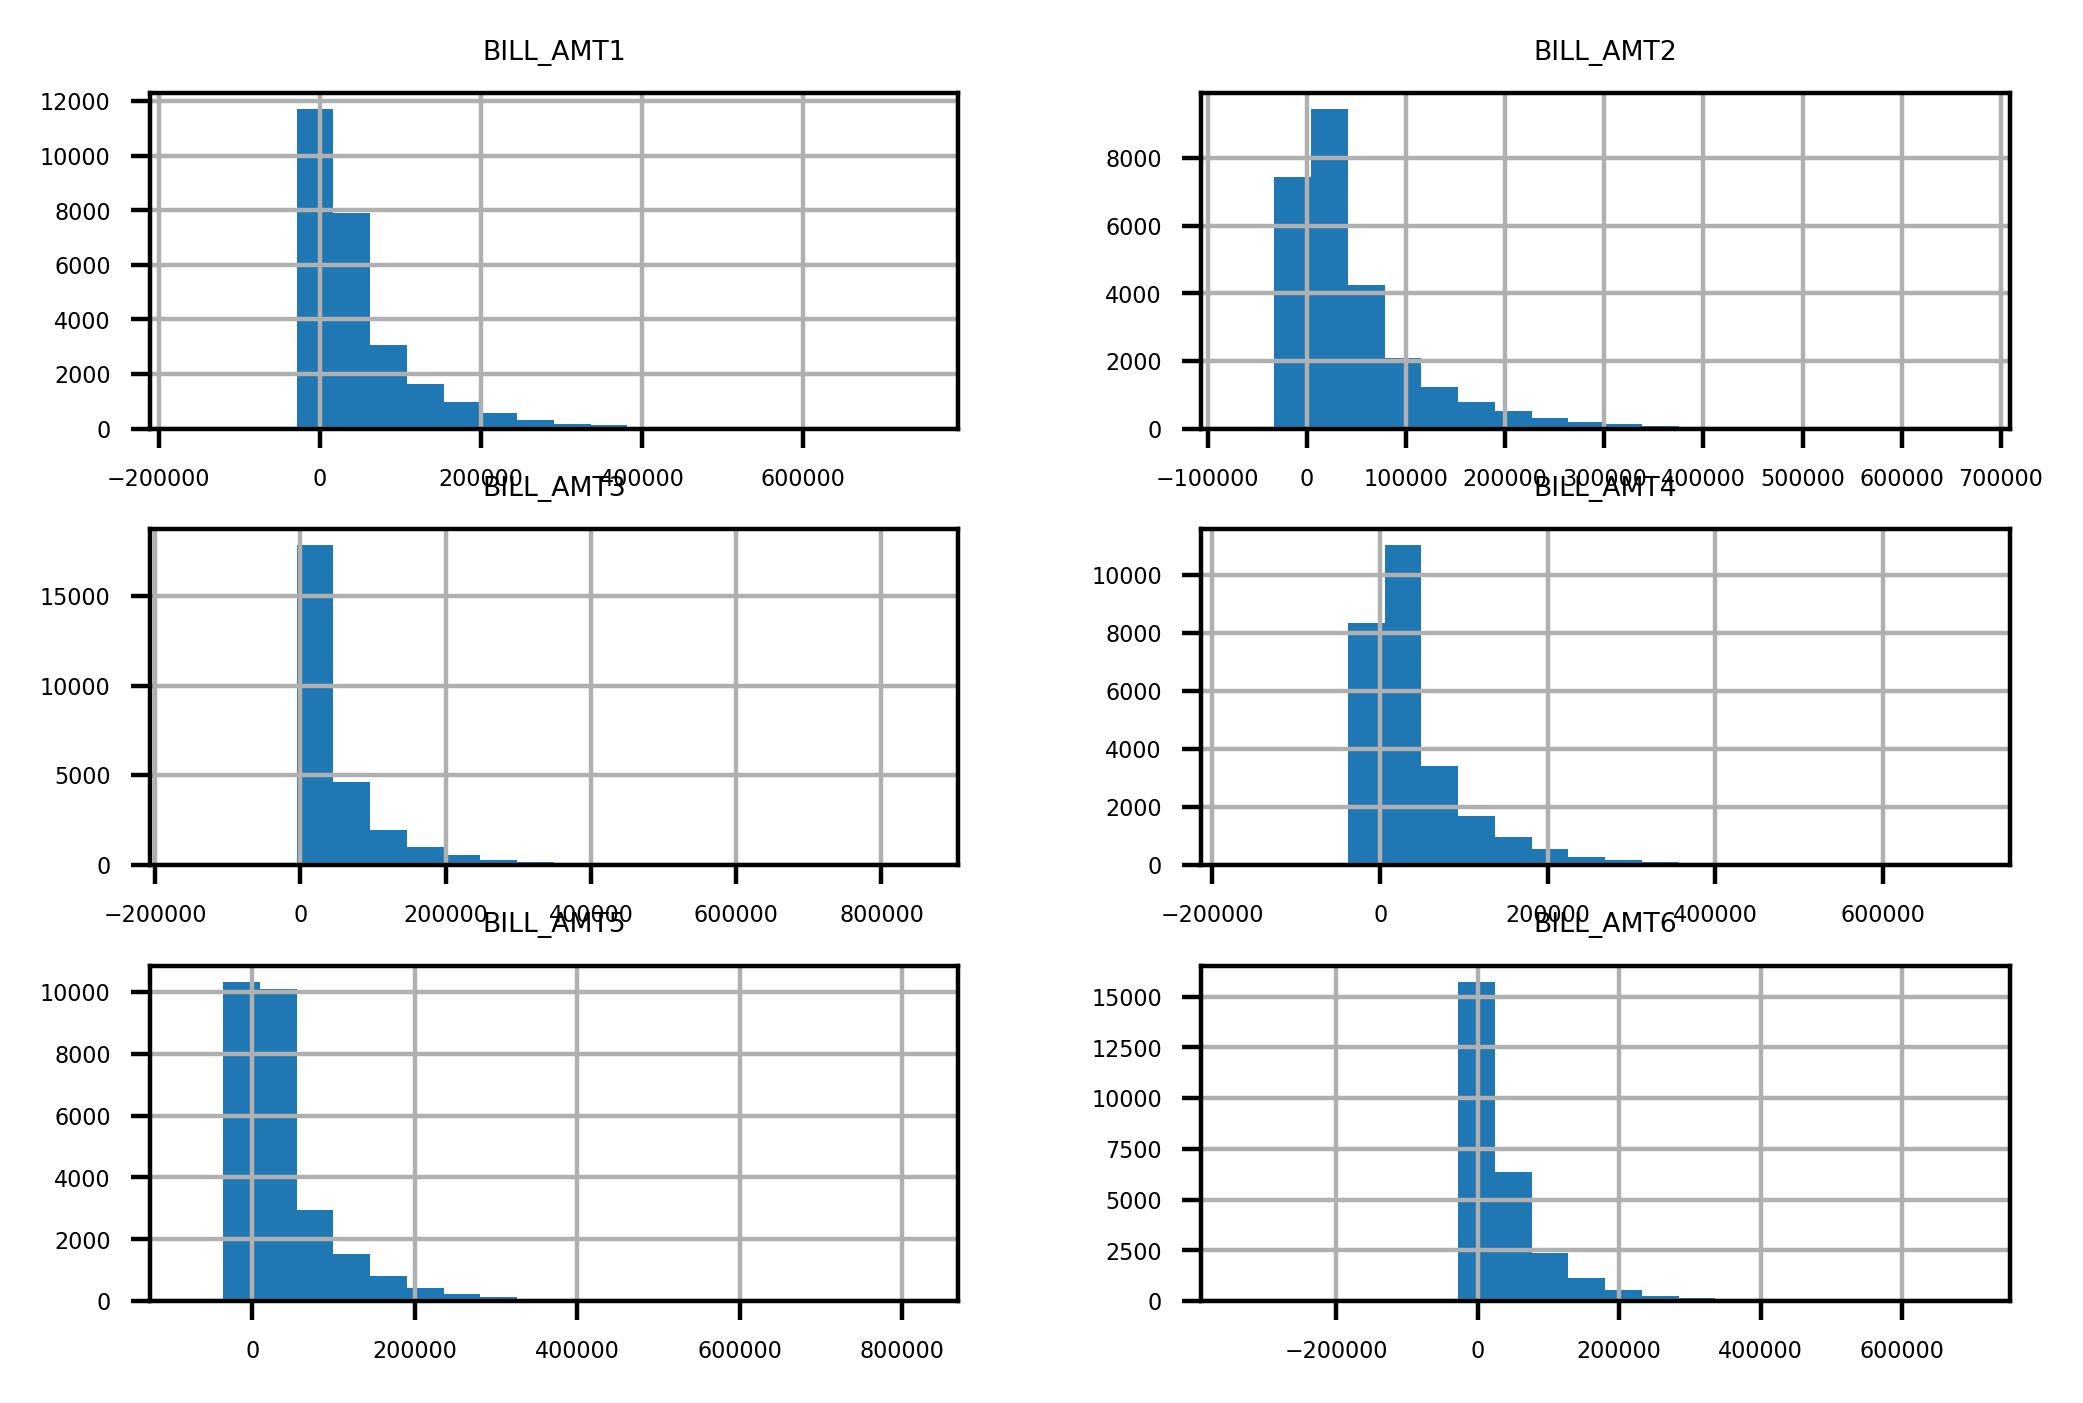

In [6]:
# sns.set_style("whitegrid")
# plt.subplot(2,3,1)
# plt.hist(df[bill_feats[0]],bins = 20)
# plt.subplot(2,3,2)
# plt.hist(df[bill_feats[1]],bins = 20)
# plt.subplot(2,3,3)
# plt.hist(df[bill_feats[2]],bins = 20)
# plt.subplot(2,3,4)
# plt.hist(df[bill_feats[3]],bins = 20)
# plt.subplot(2,3,5)
# plt.hist(df[bill_feats[4]],bins = 20)
# plt.subplot(2,3,6)
# plt.hist(df[bill_feats[5]],bins = 20)
e = 2.718

df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].hist(bins = 20)

________________________________________________________________________
**Next, obtain the `.describe()` summary of the payment amount features.**


In [7]:
for col in pay_amt_feats:
  print(df[col].describe())


count     26664.000000
mean       5704.085771
std       16699.398632
min           0.000000
25%        1000.000000
50%        2114.500000
75%        5027.000000
max      873552.000000
Name: PAY_AMT1, dtype: float64
count    2.666400e+04
mean     5.881110e+03
std      2.121431e+04
min      0.000000e+00
25%      8.020000e+02
50%      2.007000e+03
75%      5.000000e+03
max      1.227082e+06
Name: PAY_AMT2, dtype: float64
count     26664.000000
mean       5259.514964
std       17265.439561
min           0.000000
25%         390.000000
50%        1822.000000
75%        4556.250000
max      889043.000000
Name: PAY_AMT3, dtype: float64
count     26664.000000
mean       4887.048717
std       15956.349371
min           0.000000
25%         294.750000
50%        1500.000000
75%        4050.500000
max      621000.000000
Name: PAY_AMT4, dtype: float64
count     26664.000000
mean       4843.729973
std       15311.721795
min           0.000000
25%         242.750000
50%        1500.000000
75%       

    Does this make sense?

_______________________________________________________________________________________
**Next, plot a histogram of the bill payment features similar to the bill amount features, 
but also apply some rotation to the x-axis labels with the `xrot` keyword argument 
so that they don't overlap. In any plotting function, you can include the `xrot=<angle>`
keyword argument to rotate x-axis labels by a given angle in degrees.**


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000236B479DF70>,
      dtype=object)

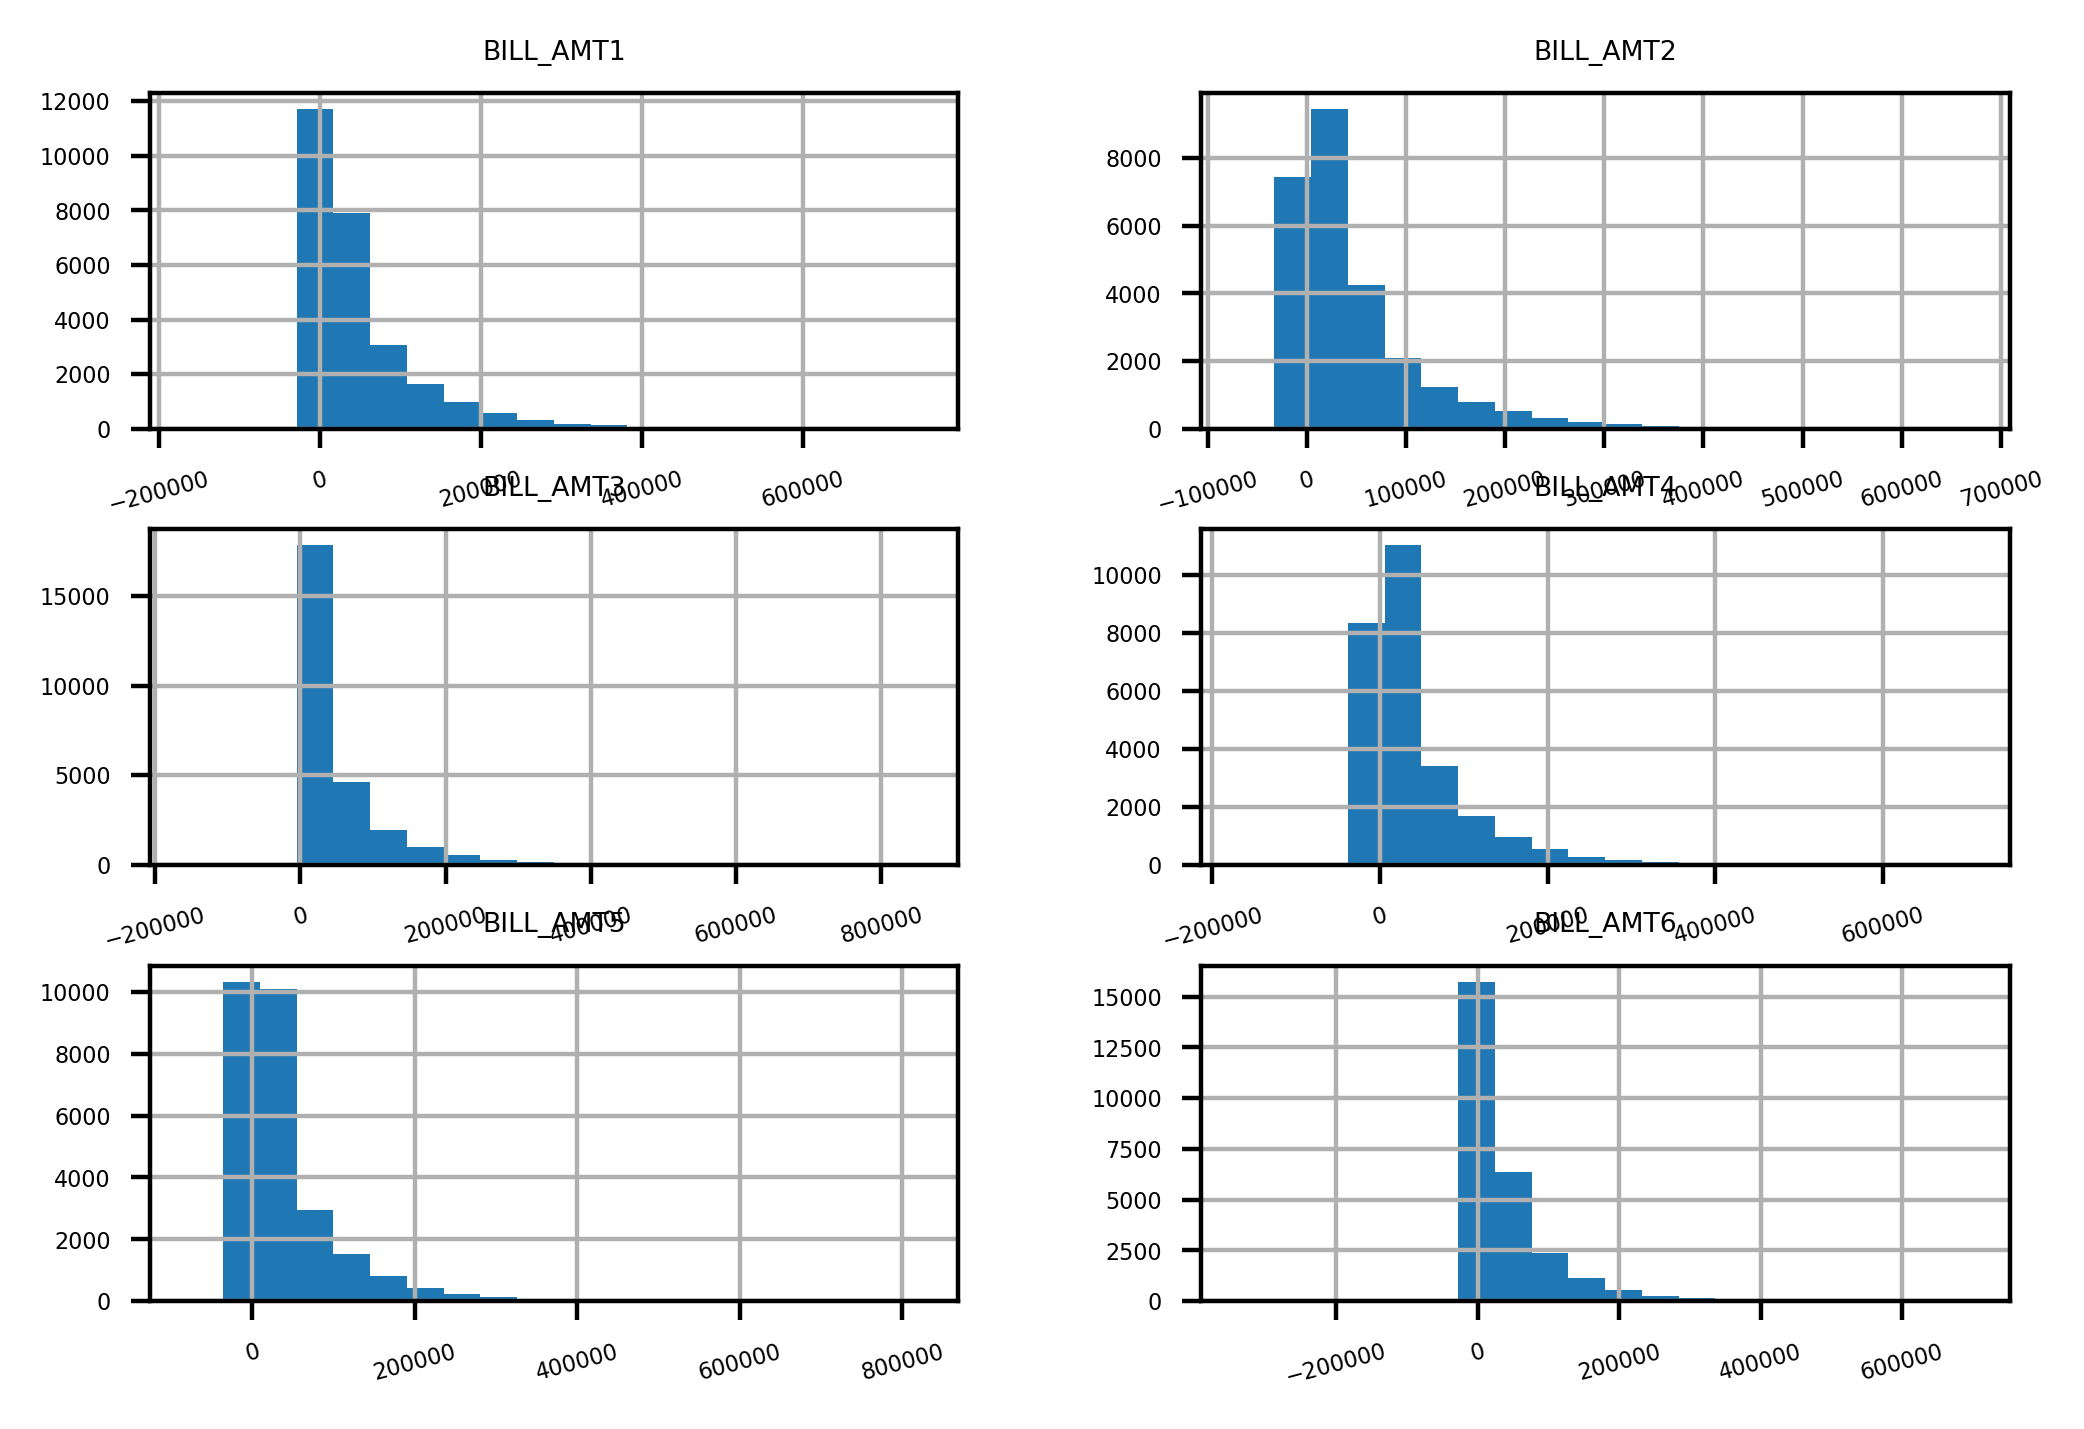

In [8]:
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].hist(bins = 20,xrot=15)

    Consider these results.

______________________________________________________________________________________________
**Then, use a Boolean mask to see how many of the payment amount data are exactly equal to 0. Review the results of the generated mask using `.head()` and `.sum()`.**



In [9]:
# Create Boolean mask
#bool_mask_df = df[pay_amt_feats].apply(lambda x : x==0)
bool_mask_0 = df[pay_amt_feats] == 0

In [10]:
# Use `.head()`
bool_mask_0.head()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,True,False,True,True,True,True
1,True,False,False,False,True,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [11]:
# Use `.sum()`
bool_mask_0.sum()

PAY_AMT1    4656
PAY_AMT2    4833
PAY_AMT3    5293
PAY_AMT4    5697
PAY_AMT5    5981
PAY_AMT6    6373
dtype: int64

     Does this make sense given the histogram in the previous step?

_______________________________________________________________________________________________________________________________
**Finally, ignoring the payments of 0 using the mask you created in the previous step, use pandas `.apply()` and NumPy's `np.log10()` to plot histograms of logarithmic transformations of the non-zero payments.**
> Hint: You can use `.apply()` to apply any function, including `log10`, to all the elements of a DataFrame or a column using the following syntax: `.apply(<function_name>)`.

In [12]:
c = df[pay_amt_feats][~bool_mask_0].apply(np.log10)

In [14]:
c.head()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,NaN,2.838219,NaN,NaN,NaN,NaN
1,NaN,3.000000,3.000000,3.000000,NaN,3.30103
2,3.181272,3.176091,3.000000,3.000000,3.000000,3.69897
3,3.301030,3.305136,3.079181,3.041393,3.028978,3.00000
4,3.301030,4.564441,4.000000,3.954243,2.838219,2.83187


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000236B47417F0>,
      dtype=object)

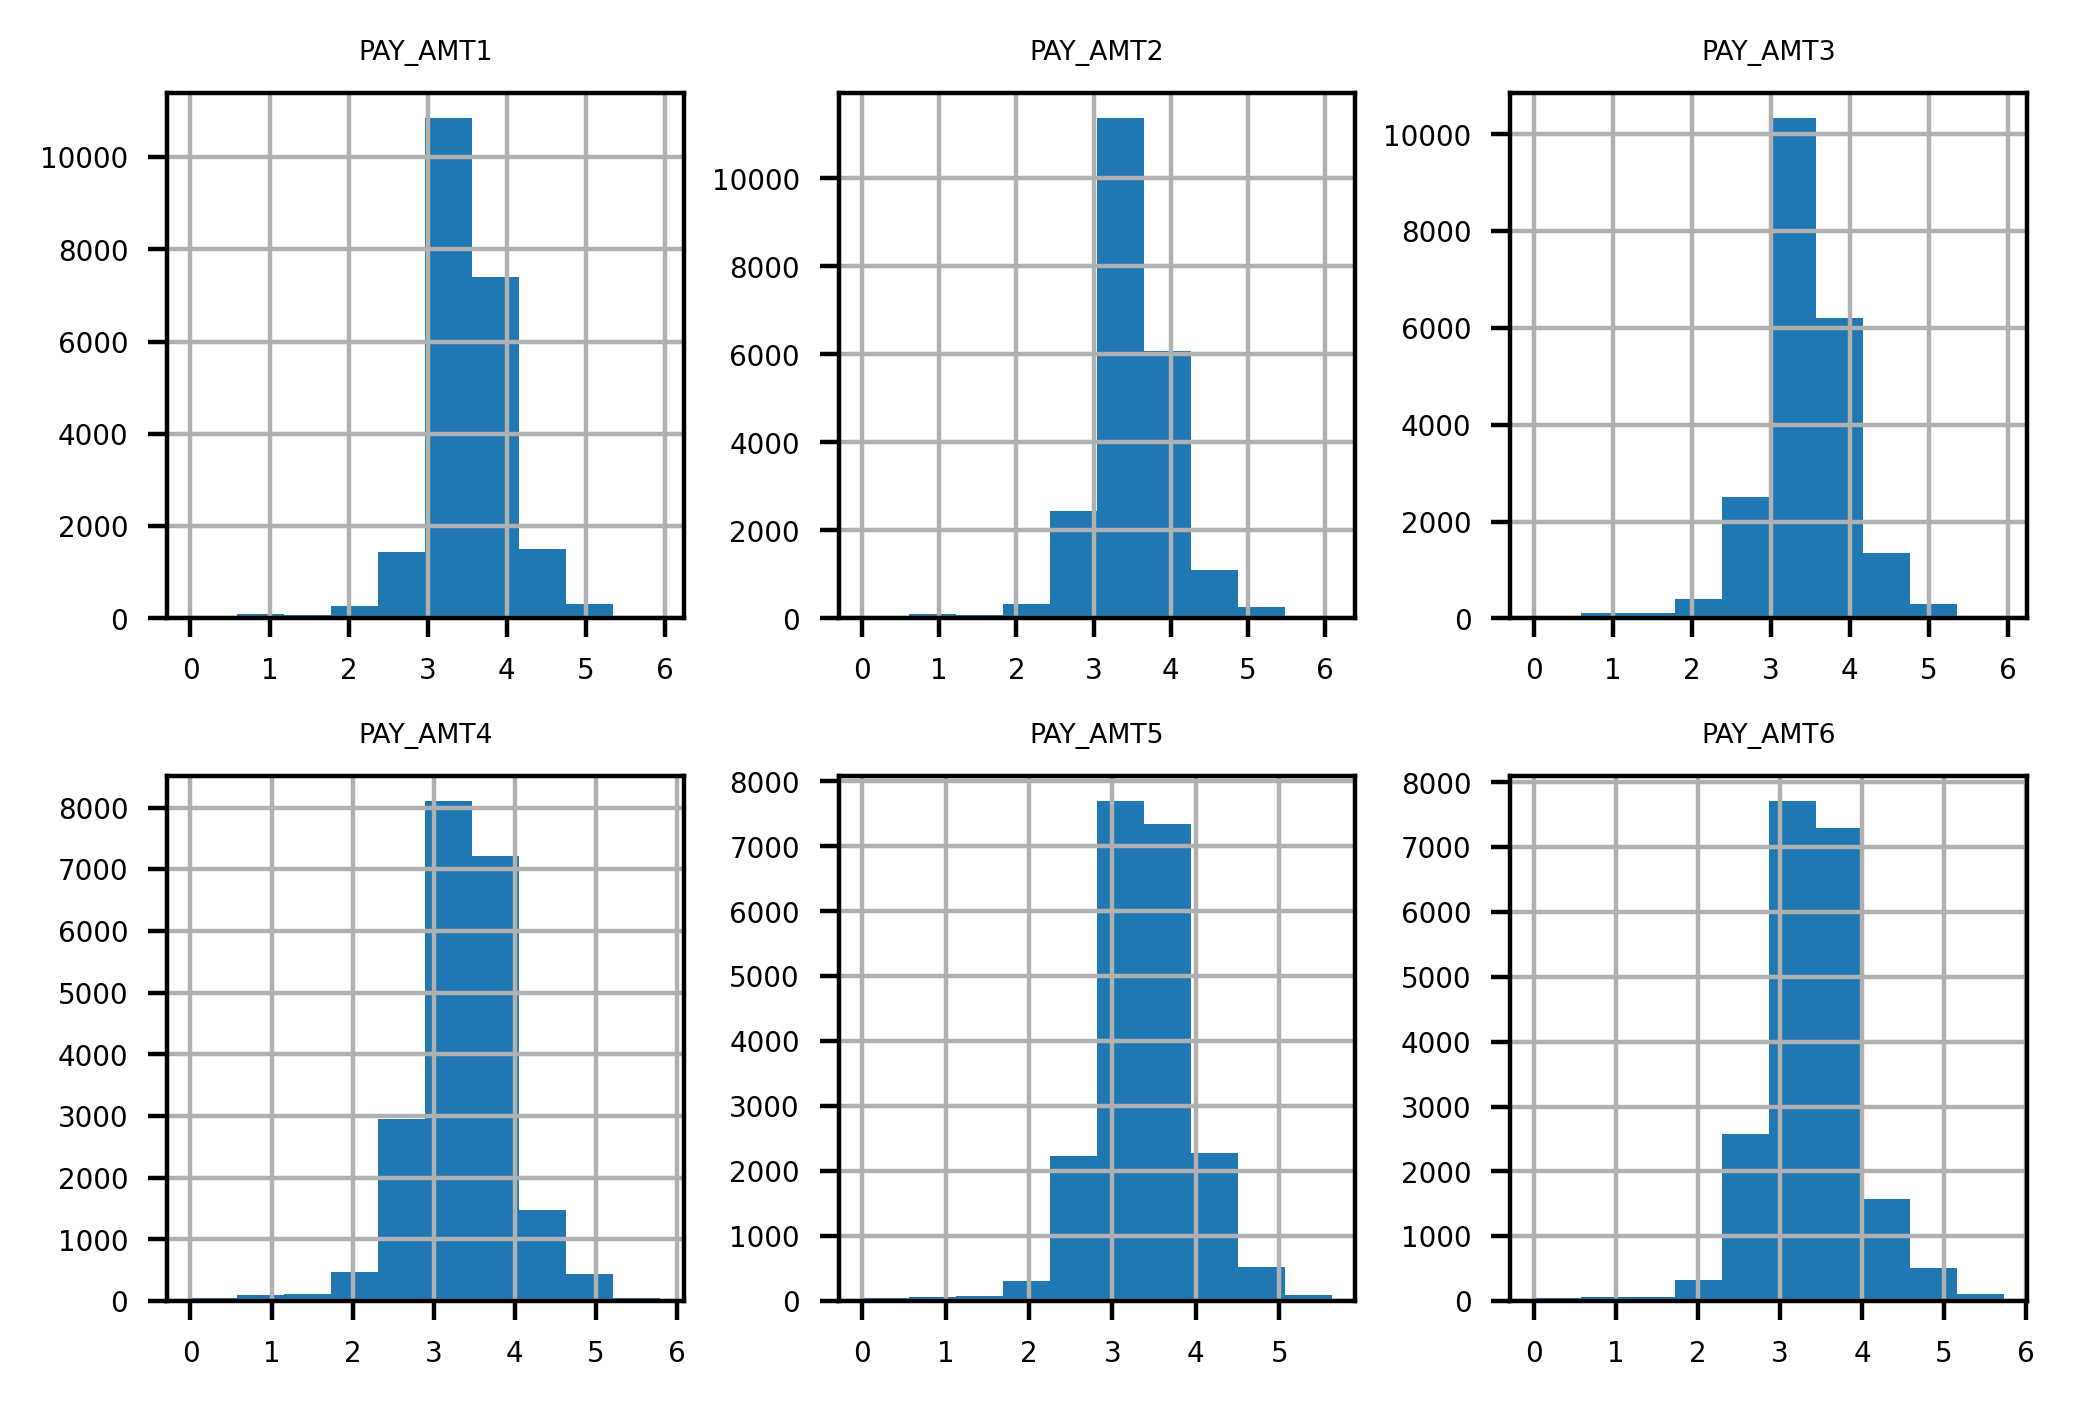

In [13]:
c.hist(xlabelsize = 5 , ylabelsize = 5 , layout = (2,3))